In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_results(file_path):
    """
    Load results from a pickle file.

    Args:
        file_path (str): Path to the pickle file.

    Returns:
        dict: Dictionary containing the loaded results.
    """
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
        return results
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None 

In [15]:
method = "DC3"
prob_type = "convex"
prob_name = "qp"
seed = 2025
fname = "Problem-100-50-50-10000"
#fname = "Problem-192-238-120-10000"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
#dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"

results = load_results(dir_path)

In [4]:
print(results.keys())
print(results['training_time_seconds'])
results['test_results']['batch_size_comparison']

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
230.38397860527039


{256: {'metrics': {'opt_gap_std': 1.989709014905413e-05,
   'opt_gap_min': -0.002270957086302948,
   'solution_distance_max': 432.49808555842293,
   'true_objective': 6570.331183916455,
   'ineq_violation_max_max': 2.092776238070854,
   'eq_violation_max_mean': 3.0370237574794956e-14,
   'eq_violation_max_max': 5.684341886080802e-14,
   'ineq_violation_l2_max': 8.663634718565707,
   'eq_violation_l1_max': 8.090536609042424e-13,
   'ineq_violation_l1_max': 8.875143240187047,
   'opt_gap_mean': -0.0005509258882156324,
   'ineq_violation_l1_mean': 6.192377000524859,
   'eq_violation_l1_mean': 5.773474986637548e-13,
   'ineq_violation_max_mean': 0.9671539440314642,
   'objective': 6566.687826957437,
   'solution_distance_std': 1.4903304293484894,
   'opt_gap_max': 0.0011239541174893038,
   'eq_violation_l2_mean': 7.245471678846658e-27,
   'eq_violation_l2_max': 1.4482971129968973e-26,
   'ineq_violation_l2_mean': 3.661086280610657,
   'solution_distance_mean': 170.33759068258615,
   'total

classical solver solve time
-------------

In [ ]:
# run this in datasets/convex/qp dir
import pickle
#filepath = "random2025_qp_dataset_var100_ineq50_eq50_ex10000"
filepath = "random2025_qp_dataset_var192_ineq238_eq120_ex10000"
with open(filepath, 'rb') as f:
        data = pickle.load(f)
print('solve_time_avg=', data['solve_time_avg'])
print('solve_time_std=', data['solve_time_std']  )

training convergence
------------

<Axes: >

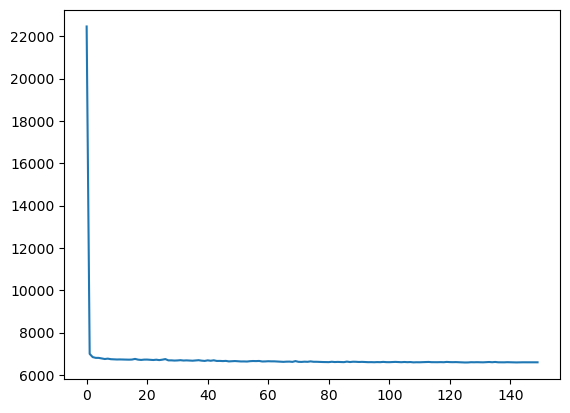

In [5]:
#results['train_history']
df = pd.DataFrame(results['train_history'])
df
df.loss.plot()

training time
-------------

In [6]:
# can be misleading, if nb epoch not adapted 
print(results.keys())
print(results['training_time_seconds'])
print(results['timestamp'])

dict_keys(['seed', 'method', 'config', 'timestamp', 'training_time_seconds', 'train_history', 'val_history', 'test_results', 'pytorch_version', 'device_used'])
230.38397860527039
2026-02-10 10:12:59


In [7]:
# just added 'epoch_time' field
# NB: this is training time, different from inference time below
df = pd.DataFrame(results['train_history'])
try:
   print('training epoch_time.mean=', df.epoch_time.mean() )
except:
   print("df.epoch_time NOT AVAILABLE !!!!!")

training epoch_time.mean= 1.53455992380778


test-time metrics: 1 algo
---------

In [ ]:
def results_to_readable(results):
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']

    # Create a more readable DataFrame by expanding the metrics
    readable_data = []
    for batch_size, data in batch_comparison.items():
        metrics = data['metrics']
        row = {'Method': method,
            'Batch Size': batch_size,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Violation Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Violation Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Violation Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Violation Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Average Batch inference time (s)': f"{metrics['avg_inference_time']:.4f}",
        }
        readable_data.append(row)

    df_readable = pd.DataFrame(readable_data)
    return df_readable
df_readable = results_to_readable(results)
df_readable_styled = df_readable.style.set_properties(**{'text-align': 'center'})
display(df_readable_styled)
print(df_readable.T.to_latex())

<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_7596/2982497909.py:11: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_7596/2982497909.py:13: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
/tmp/ipykernel_7596/2982497909.py:14: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


,Method,Batch Size,Opt Gap Mean (\%),Opt Gap Std (\%),Opt Gap Max (\%),Eq Violation Mean,Eq Violation Max,Ineq Violation Mean,Ineq Violation Max,Average Batch inference Time (s)
0,DC3,256,1.5476,7.29e-03,2.4473,4.89e-13,5.72e-13,3.65e-02,3.45e-01,0.0368
1,DC3,512,1.5476,0.00e+00,2.6616,4.89e-13,5.68e-13,3.65e-02,3.81e-01,0.0423


\begin{tabular}{lll}
\toprule
 & 0 & 1 \\
\midrule
Method & DC3 & DC3 \\
Batch Size & 256 & 512 \\
Opt Gap Mean (\%) & 1.5476 & 1.5476 \\
Opt Gap Std (\%) & 7.29e-03 & 0.00e+00 \\
Opt Gap Max (\%) & 2.4473 & 2.6616 \\
Eq Violation Mean & 4.89e-13 & 4.89e-13 \\
Eq Violation Max & 5.72e-13 & 5.68e-13 \\
Ineq Violation Mean & 3.65e-02 & 3.65e-02 \\
Ineq Violation Max & 3.45e-01 & 3.81e-01 \\
Average Batch inference Time (s) & 0.0368 & 0.0423 \\
\bottomrule
\end{tabular}



test-time metrics: all algo
---------

In [ ]:
row_l = []
seed = 2025
#algo_l = ['DC3','FSNet','skm']
algo_l = ['penalty','FSNet','DC3','skm']
algo_l = ['penalty','DC3','skm']
batch_size = 256
#fname = "Problem-100-50-50-10000"
fname = "Problem-192-238-120-10000"
for method in algo_l:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    print(dir_path)
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(batch_size))['metrics']
    # AH !!!!!!
    avg_sample_time = metrics['avg_inference_time']/batch_size
    row = {
        'Algorithm': method,
            'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.4f}",
            #'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
            'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",
            'Eq Viol Mean': f"{metrics['eq_violation_l1_mean']:.2e}",
            'Eq Viol Max': f"{metrics['eq_violation_l1_max']:.2e}",
            'Ineq Viol Mean': f"{metrics['ineq_violation_l1_mean']:.2e}",
            'Ineq Viol Max': f"{metrics['ineq_violation_l1_max']:.2e}",
            'Sample inference time (s)': f"{avg_sample_time:.2e}",
        
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
#print(df)
print(df.T.to_latex())

convex/qp/QPProblem-192-238-120-10000/MLP_penalty/results_seed2025.pkl
convex/qp/QPProblem-192-238-120-10000/MLP_DC3/results_seed2025.pkl
convex/qp/QPProblem-192-238-120-10000/MLP_skm/results_seed2025.pkl
\begin{tabular}{llll}
\toprule
 & 0 & 1 & 2 \\
\midrule
Algorithm & penalty & DC3 & skm \\
Opt Gap Mean (\%) & -2.8059 & -0.0551 & 0.2545 \\
Opt Gap Std (\%) & 1.26e-02 & 1.99e-03 & 1.38e-03 \\
Opt Gap Max (\%) & -1.8974 & 0.1124 & 0.3764 \\
Eq Viol Mean & 2.23e+01 & 5.77e-13 & 5.33e-13 \\
Eq Viol Max & 2.69e+01 & 8.09e-13 & 6.76e-13 \\
Ineq Viol Mean & 1.55e-01 & 6.19e+00 & 2.21e-12 \\
Ineq Viol Max & 2.40e-01 & 8.88e+00 & 5.64e-10 \\
Avg sample inference Time (s) & 1.17e-06 & 1.87e-04 & 3.28e-03 \\
\bottomrule
\end{tabular}



<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:25: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:25: SyntaxWarning: invalid escape sequence '\%'
<>:26: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_7596/3158314499.py:23: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Mean (\%)': f"{metrics['opt_gap_mean']*100:.4f}",
/tmp/ipykernel_7596/3158314499.py:25: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Std (\%)': f"{metrics['opt_gap_std']*100:.2e}",
/tmp/ipykernel_7596/3158314499.py:26: SyntaxWarning: invalid escape sequence '\%'
  'Opt Gap Max (\%)': f"{metrics['opt_gap_max']*100:.4f}",


seed variability
------------------

In [ ]:

seed_l = [2025,2025]
row_l = []
for seed in seed_l:
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-100-50-50-10000/MLP_{method}/results_seed{seed}.pkl"
    #dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}Problem-192-238-120-1000/MLP_{method}/results_seed{seed}.pkl"
    dir_path = f"{prob_type}/{prob_name}/{prob_name.upper()}{fname}/MLP_{method}/results_seed{seed}.pkl"
    results = load_results(dir_path)
    # Get batch comparison data from the loaded results
    batch_comparison = results['test_results']['batch_size_comparison']
    # get only batchsize 256
    metrics = (results['test_results']['batch_size_comparison'].pop(256))['metrics']
    # 
    row = {
        'Opt Gap Mean (%)': metrics['opt_gap_mean']*100,
        'Opt Gap Std (%)': metrics['opt_gap_std']*100,
        'Opt Gap Max (%)': metrics['opt_gap_max']*100,
        'Eq Violation Mean': metrics['eq_violation_l1_mean'],
        'Eq Violation Max': metrics['eq_violation_l1_max'],
        'Ineq Violation Mean': metrics['ineq_violation_l1_mean'],
        'Ineq Violation Max': metrics['ineq_violation_l1_max'],
        'Average Batch inference Time (s)': metrics['avg_inference_time'],
    }
    row_l.append(row)

df = pd.DataFrame(row_l)
#print(df)
print('STD over realizations:\n')
print(df.std(axis=0).T)

STD over realizations:

Opt Gap Mean (%)                    0.0
Opt Gap Std (%)                     0.0
Opt Gap Max (%)                     0.0
Eq Violation Mean                   0.0
Eq Violation Max                    0.0
Ineq Violation Mean                 0.0
Ineq Violation Max                  0.0
Average Batch inference Time (s)    0.0
dtype: float64


In [46]:
metrics

{'ineq_violation_l1_mean': 7.579644772244737,
 'eq_violation_l1_max': 7.6996463896565e-13,
 'opt_gap_mean': 0.003252167389391278,
 'opt_gap_std': 0.0,
 'eq_violation_l2_max': 2.2994219401745706e-26,
 'ineq_violation_l1_max': 11.553908975497043,
 'solution_distance_max': 1249.8390866023585,
 'eq_violation_l1_mean': 5.506841251732192e-13,
 'opt_gap_min': 0.0010788242820738859,
 'ineq_violation_l2_max': 15.61398690267724,
 'ineq_violation_max_max': 3.07336031011288,
 'solution_distance_mean': 572.142935063266,
 'objective': 6587.043134130591,
 'opt_gap_max': 0.005391351267692645,
 'eq_violation_l2_mean': 7.480583341440109e-27,
 'solution_distance_std': 0.0,
 'ineq_violation_max_mean': 1.5459588320440505,
 'eq_violation_max_mean': 3.432809592140984e-14,
 'eq_violation_max_max': 8.881784197001252e-14,
 'true_objective': 6565.725084424895,
 'ineq_violation_l2_mean': 7.4865112796324915,
 'total_time': 0.24605822563171387,
 'avg_inference_time': 0.24605822563171387}